In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

In [2]:
fight_stats = pd.read_csv('fight_stats.csv', sep=';')
fight_stats

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
1,Angela Hill,Ashley Yoder,Mike Beltran,2021-03-13,"Las Vegas, Nevada, USA",Red,False,WomenStrawweight,0.015625,0.0,...,5,1,0,1,Orthodox,160.02,162.56,115.0,33.0,36.0
2,Gloria de Paula,Jinh Yu Frey,Mike Beltran,2021-03-13,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,0.000000,0.0,...,0,0,0,0,Orthodox,165.10,170.18,115.0,35.0,25.0
3,Livinha Souza,Amanda Lemos,Jason Herzog,2021-03-06,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,0.500000,0.0,...,1,0,1,0,Orthodox,160.02,160.02,115.0,33.0,29.0
4,Polyana Viana,Mallory Martin,Mark Smith,2021-02-13,"Las Vegas, Nevada, USA",Red,False,WomenStrawweight,0.000000,0.5,...,0,0,2,0,Orthodox,165.10,170.18,115.0,27.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Holly Holm,Megan Anderson,Kevin MacDonald,2018-06-09,"Chicago, Illinois, USA",Red,False,WomenFeatherweight,NaN,NaN,...,1,2,0,0,Southpaw,172.72,175.26,135.0,28.0,36.0
467,Cristiane Justino,Yana Kunitskaya,Herb Dean,2018-03-03,"Las Vegas, Nevada, USA",Red,True,WomenFeatherweight,NaN,NaN,...,1,3,0,0,Orthodox,172.72,172.72,145.0,28.0,32.0
468,Cristiane Justino,Holly Holm,Herb Dean,2017-12-30,"Las Vegas, Nevada, USA",Red,True,WomenFeatherweight,0.531250,0.0,...,0,3,0,0,Orthodox,172.72,172.72,145.0,36.0,32.0
469,Cristiane Justino,Tonya Evinger,Mike Beltran,2017-07-29,"Anaheim, California, USA",Red,True,WomenFeatherweight,NaN,NaN,...,0,2,0,0,Orthodox,172.72,172.72,145.0,36.0,32.0


In [3]:
list(fight_stats.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'B_avg_KD',
 'B_avg_opp_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'B_avg_REV',
 'B_avg_opp_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_opp_SIG_STR_att',
 'B_avg_opp_SIG_STR_landed',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_avg_opp_TOTAL_STR_att',
 'B_avg_opp_TOTAL_STR_landed',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_opp_TD_att',
 'B_avg_opp_TD_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_opp_LEG_att',
 'B_avg_opp_LEG_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_lande

Just for my own curiosity, I want to find out:
- the time period for this dataset
- which fighters are fighting the most (on both sides)

In [4]:
fight_stats['date'].min()

'2013-02-23'

In [5]:
fight_stats['date'].max()

'2021-03-20'

In [6]:
fight_stats['R_fighter'].value_counts()

Amanda Nunes          11
Randa Markos          11
Claudia Gadelha       11
Carla Esparza         10
Tecia Torres          10
                      ..
Bea Malecki            1
Kelly Faszholz         1
Larissa Pacheco        1
Alexis Dufresne        1
Julija Stoliarenko     1
Name: R_fighter, Length: 143, dtype: int64

In [7]:
fight_stats['B_fighter'].value_counts()

Angela Hill        13
Jessica Eye         8
Jessica Andrade     8
Lucie Pudilova      7
Bethe Correia       7
                   ..
Sarah Kaufman       1
Larissa Pacheco     1
Jessica Rakoczy     1
Peggy Morgan        1
Leah Letson         1
Name: B_fighter, Length: 165, dtype: int64

Fighters are divided into either the red corner or the blue corner. In general, the red corner is assigned to fighters that are more notable (more favoured to win). Let's see if that's true for this dataset. 

In [8]:
fight_stats['Winner'].unique()

array(['Blue', 'Red', 'Draw'], dtype=object)

In [9]:
fight_stats['Winner'].value_counts()

Red     279
Blue    186
Draw      6
Name: Winner, dtype: int64

<Axes: xlabel='Winner', ylabel='count'>

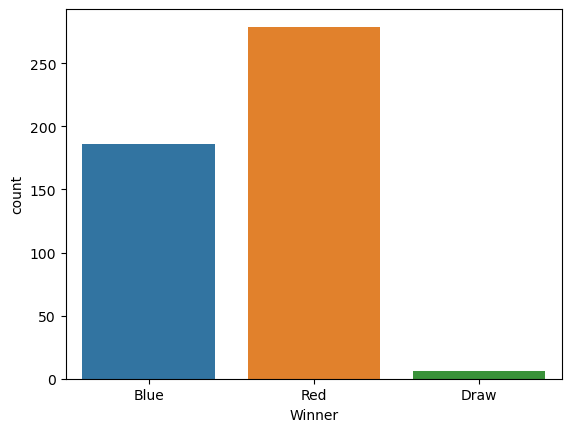

In [10]:
sns.countplot(x=fight_stats['Winner'], data=fight_stats)

Let's investigate the correlations between all the variables. 

In [11]:
# Calculate correlation matrix for all variables in raw dataset
corr_matrix = fight_stats.corr().abs()

# Unpack matrix and convert to list of pairs of variables that can be sorted and iterated over
correlations = corr_matrix.stack().sort_values(ascending=False)
correlations = correlations.iloc[fight_stats.shape[1]-1::2]

# Print the ten largest correlations
print(correlations.head(10))

B_avg_opp_SIG_STR_att   B_avg_opp_DISTANCE_att    0.977256
B_avg_LEG_landed        B_avg_LEG_att             0.976970
B_avg_DISTANCE_att      B_avg_SIG_STR_att         0.975740
B_avg_HEAD_att          B_avg_SIG_STR_att         0.975271
R_avg_opp_LEG_att       R_avg_opp_LEG_landed      0.974914
R_avg_SIG_STR_att       R_avg_DISTANCE_att        0.974798
R_avg_opp_SIG_STR_att   R_avg_opp_HEAD_att        0.974727
R_avg_opp_DISTANCE_att  R_avg_opp_SIG_STR_att     0.974159
B_avg_GROUND_att        B_avg_GROUND_landed       0.969491
B_avg_CLINCH_landed     B_avg_CLINCH_att          0.968644
dtype: float64


/var/folders/mg/9c8_3q293sgg37fxt_551_tm0000gn/T/ipykernel_4120/2990098215.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = fight_stats.corr().abs()


The correlation tables seem to show very strong relationships amongst the variables. 

This dataset provides an extensive amount of information for each of these fights and there are a lot of acronyms that I'm unfamiliar with. To understand and learn from this experience, I'm using an amazing data analysis example from Rohan Kasuganti and Savya Konkalmatt as a guide.  
https://skonkalmatt.github.io/UFC_Data_Analysis/

They are using the same dataset that includes both male and female fighters but for my own project, I'm only interested in female fighters. I will also be splitting the female fighters into weight classes for a simplified analysis on fighting components. We will be investigating 3 different fighting components: striking, grappling and defense. This is a very simplified version because we are only looking at one variable for each fighting component. Please keep in mind there are other variables that plays into these components, which we will dive deeper in the next part. 

Since we know that red is the stronger corner, let's see if the numbers match. 

In [12]:
feather = fight_stats[fight_stats['weight_class'] == 'WomenFeatherweight']
bantam = fight_stats[fight_stats['weight_class'] == 'WomenBantamweight']
fly = fight_stats[fight_stats['weight_class'] == 'WomenFlyweight']
straw = fight_stats[fight_stats['weight_class'] == 'WomenStrawweight']

## STRIKING PORTION

In [13]:
print(feather.sort_values(by=['R_avg_HEAD_landed'], ascending=False)
      [['R_fighter','R_avg_HEAD_landed']].drop_duplicates(subset=['R_fighter'],
                                                          keep='first', inplace=False).head())
print(feather.sort_values(by=['B_avg_HEAD_landed'], ascending=False)
      [['B_fighter','B_avg_HEAD_landed']].drop_duplicates(subset=['B_fighter'],
                                                          keep='first', inplace=False).head())

             R_fighter  R_avg_HEAD_landed
455       Amanda Nunes          65.392212
467  Cristiane Justino          53.250000
470         Holly Holm          25.125000
463        Cat Zingano          17.687500
457    Felicia Spencer          17.000000
                B_fighter  B_avg_HEAD_landed
462          Amanda Nunes          46.275391
456       Felicia Spencer          27.500000
468            Holly Holm          15.781250
463        Megan Anderson          15.000000
470  Germaine de Randamie          12.125000


In [14]:
print(bantam.sort_values(by=['R_avg_HEAD_landed'], ascending=False)
      [['R_fighter','R_avg_HEAD_landed']].drop_duplicates(subset=['R_fighter'],
                                                          keep='first', inplace=False).head())
print(bantam.sort_values(by=['B_avg_HEAD_landed'], ascending=False)
      [['B_fighter','B_avg_HEAD_landed']].drop_duplicates(subset=['B_fighter'],
                                                          keep='first', inplace=False).head())

           R_fighter  R_avg_HEAD_landed
209       Karol Rosa          108.00000
321    Jessamyn Duke           80.00000
258     Leslie Smith           73.40625
235     Irene Aldana           70.62500
314  Jessica Andrade           69.00000
           B_fighter  B_avg_HEAD_landed
228    Nicco Montano              138.0
324  Jessica Andrade               91.0
263     Irene Aldana               84.0
300    Sarah Kaufman               79.5
260   Lucie Pudilova               77.0


In [15]:
print(fly.sort_values(by=['R_avg_HEAD_landed'], ascending=False)
      [['R_fighter','R_avg_HEAD_landed']].drop_duplicates(subset=['R_fighter'],
                                                          keep='first', inplace=False).head())
print(fly.sort_values(by=['B_avg_HEAD_landed'], ascending=False)
      [['B_fighter','B_avg_HEAD_landed']].drop_duplicates(subset=['B_fighter'],
                                                          keep='first', inplace=False).head())

                R_fighter  R_avg_HEAD_landed
368          Molly McCann           70.87500
431     Roxanne Modafferi           67.00000
454    Valerie Letourneau           61.50000
369         Diana Belbita           58.00000
421  Valentina Shevchenko           55.71875
              B_fighter  B_avg_HEAD_landed
347       Lara Procopio            122.000
367      Luana Carolina             75.000
414      Lucie Pudilova             72.875
442  Jessica-Rose Clark             61.000
425   Roxanne Modafferi             58.500


In [16]:
print(straw.sort_values(by=['R_avg_HEAD_landed'], ascending=False)
      [['R_fighter','R_avg_HEAD_landed']].drop_duplicates(subset=['R_fighter'],
                                                          keep='first', inplace=False).head())
print(straw.sort_values(by=['B_avg_HEAD_landed'], ascending=False)
      [['B_fighter','B_avg_HEAD_landed']].drop_duplicates(subset=['B_fighter'],
                                                          keep='first', inplace=False).head())

              R_fighter  R_avg_HEAD_landed
136  Joanna Jedrzejczyk          94.875000
50          Yan Xiaonan          88.000000
89      Jessica Andrade          69.197266
1           Angela Hill          67.764404
134     Claudia Gadelha          60.625000
                 B_fighter  B_avg_HEAD_landed
83             Syuri Kondo         100.000000
17            Inoue Mizuki          86.000000
173     Valerie Letourneau          85.000000
80             Yan Xiaonan          80.000000
71   Karolina Kowalkiewicz          71.109375


In [17]:
# Here are some top 10 fighters from the striking portion of the data.
print(fight_stats.sort_values(by=['R_avg_HEAD_landed'], ascending=False)[['R_fighter','R_avg_HEAD_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(10))
print(fight_stats.sort_values(by=['B_avg_HEAD_landed'], ascending=False)[['B_fighter','B_avg_HEAD_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(10))

              R_fighter  R_avg_HEAD_landed
209          Karol Rosa         108.000000
136  Joanna Jedrzejczyk          94.875000
50          Yan Xiaonan          88.000000
321       Jessamyn Duke          80.000000
258        Leslie Smith          73.406250
368        Molly McCann          70.875000
235        Irene Aldana          70.625000
89      Jessica Andrade          69.197266
1           Angela Hill          67.764404
431   Roxanne Modafferi          67.000000
              B_fighter  B_avg_HEAD_landed
228       Nicco Montano              138.0
347       Lara Procopio              122.0
83          Syuri Kondo              100.0
324     Jessica Andrade               91.0
17         Inoue Mizuki               86.0
173  Valerie Letourneau               85.0
263        Irene Aldana               84.0
80          Yan Xiaonan               80.0
300       Sarah Kaufman               79.5
260      Lucie Pudilova               77.0


Except for the featherweight, the rest of the weightclasses seem to be contradicting the overall results (red is the stronger corner). The blue corner seems to have a higher number of strikes in general when compare to the red corner. Does this mean that there are other components of a fight that are crucial in determining the fight results? But what about the featherweight? Is it just an outlier or does weight matter?

Let's look at another component: grappling. 

## GRAPPLING PORTION

In [18]:
print(feather.sort_values(by=['B_avg_TD_landed'], ascending=False)
      [['R_fighter','R_avg_TD_landed']].drop_duplicates(subset=['R_fighter'],
                                                        keep='first', inplace=False).head())
print(feather.sort_values(by=['R_avg_TD_landed'], ascending=False)
      [['B_fighter','B_avg_TD_landed']].drop_duplicates(subset=['B_fighter'],
                                                        keep='first', inplace=False).head())

             R_fighter  R_avg_TD_landed
462  Cristiane Justino         0.625000
456       Amanda Nunes         4.259033
457    Felicia Spencer         0.500000
463        Cat Zingano         3.500000
470         Holly Holm         0.187500
           B_fighter  B_avg_TD_landed
455   Megan Anderson         0.250000
456  Felicia Spencer         0.750000
469    Tonya Evinger              NaN
462     Amanda Nunes         2.072266
457      Zarah Fairn         0.000000


In [19]:
print(bantam.sort_values(by=['B_avg_TD_landed'], ascending=False)
      [['R_fighter','R_avg_TD_landed']].drop_duplicates(subset=['R_fighter'],
                                                        keep='first', inplace=False).head())
print(bantam.sort_values(by=['R_avg_TD_landed'], ascending=False)
      [['B_fighter','B_avg_TD_landed']].drop_duplicates(subset=['B_fighter'],
                                                        keep='first', inplace=False).head())

              R_fighter  R_avg_TD_landed
262  Ashlee Evans-Smith         1.500000
286        Amanda Nunes         0.312500
238       Marion Reneau         0.046875
228       Julianna Pena         1.562500
308         Miesha Tate         1.250000
         B_fighter  B_avg_TD_landed
326    Sara McMann            2.000
302  Lauren Murphy            0.000
251   Irene Aldana            0.500
309  Marion Reneau              NaN
267  Julianna Pena            2.125


In [20]:
print(fly.sort_values(by=['B_avg_TD_landed'], ascending=False)
      [['R_fighter','R_avg_TD_landed']].drop_duplicates(subset=['R_fighter'],
                                                        keep='first', inplace=False).head())
print(fly.sort_values(by=['R_avg_TD_landed'], ascending=False)
      [['B_fighter','B_avg_TD_landed']].drop_duplicates(subset=['B_fighter'],
                                                        keep='first', inplace=False).head())

                R_fighter  R_avg_TD_landed
444          Alexis Davis         0.203125
395  Valentina Shevchenko         2.648438
416    Ashlee Evans-Smith         0.687500
351     Gillian Robertson         2.476562
353     Katlyn Chookagian         0.750000
               B_fighter  B_avg_TD_landed
429        Jennifer Maia              NaN
414       Lucie Pudilova         0.000000
405          Jessica Eye         0.640625
368         Taila Santos         1.000000
379  Mara Romero Borella         1.250000


In [21]:
print(straw.sort_values(by=['B_avg_TD_landed'], ascending=False)
      [['R_fighter','R_avg_TD_landed']].drop_duplicates(subset=['R_fighter'],
                                                        keep='first', inplace=False).head())
print(straw.sort_values(by=['R_avg_TD_landed'], ascending=False)
      [['B_fighter','B_avg_TD_landed']].drop_duplicates(subset=['B_fighter'],
                                                        keep='first', inplace=False).head())

              R_fighter  R_avg_TD_landed
94     Cynthia Calvillo           1.5000
145  Joanna Jedrzejczyk           0.0000
172       Alex Chambers           1.0000
82         Alexa Grasso           0.2500
81      Claudia Gadelha           1.5625
                 B_fighter  B_avg_TD_landed
71   Karolina Kowalkiewicz          0.25000
165        Jessica Aguilar              NaN
48           Nina Ansaroff          0.09375
179     Joanna Jedrzejczyk          0.00000
134          Cortney Casey          0.50000


In [22]:
# Here are some top 10 fighters in the grappling portion of the data.
print(fight_stats.sort_values(by=['B_avg_TD_landed'], ascending=False)
      [['R_fighter','R_avg_TD_landed']].drop_duplicates(subset=['R_fighter'],
                                                        keep='first', inplace=False).head(10))
print(fight_stats.sort_values(by=['R_avg_TD_landed'], ascending=False)
      [['B_fighter','B_avg_TD_landed']].drop_duplicates(subset=['B_fighter'],
                                                        keep='first', inplace=False).head(10))

                R_fighter  R_avg_TD_landed
172         Alex Chambers         1.000000
145    Joanna Jedrzejczyk         0.000000
94       Cynthia Calvillo         1.500000
262    Ashlee Evans-Smith         1.500000
286          Amanda Nunes         0.312500
81        Claudia Gadelha         1.562500
82           Alexa Grasso         0.250000
444          Alexis Davis         0.203125
51         Rose Namajunas         0.953125
395  Valentina Shevchenko         2.648438
                 B_fighter  B_avg_TD_landed
71   Karolina Kowalkiewicz          0.25000
165        Jessica Aguilar              NaN
48           Nina Ansaroff          0.09375
455         Megan Anderson          0.25000
178     Joanna Jedrzejczyk          0.00000
134          Cortney Casey          0.50000
151           Tecia Torres          0.75000
456        Felicia Spencer          0.75000
123           Randa Markos          1.06250
113           Maryna Moroz          0.25000


The grappling component shows a higher number in red fighters than in blue fighters which agrees with the overall results. Does this mean the grappling component plays a huge role in determining if a fighter will win in a fight? Let's look at the final component: defense. 

## DEFENSE PORTION

In [23]:
print(feather.sort_values(by=['R_avg_opp_HEAD_landed'], ascending=True)
      [['R_fighter','R_avg_opp_HEAD_landed']].drop_duplicates(subset=['R_fighter'],
                                                              keep='first', inplace=False).head())
print(feather.sort_values(by=['B_avg_opp_HEAD_landed'], ascending=True)
      [['B_fighter','B_avg_opp_HEAD_landed']].drop_duplicates(subset=['B_fighter'],
                                                              keep='first', inplace=False).head())

             R_fighter  R_avg_opp_HEAD_landed
469  Cristiane Justino               2.000000
458     Megan Anderson               7.625000
456       Amanda Nunes              14.588623
463        Cat Zingano              15.250000
457    Felicia Spencer              30.500000
                B_fighter  B_avg_opp_HEAD_landed
460       Felicia Spencer               2.000000
455        Megan Anderson               4.312500
470  Germaine de Randamie               4.500000
457           Zarah Fairn              10.000000
468            Holly Holm              17.171875


In [24]:
print(bantam.sort_values(by=['R_avg_opp_HEAD_landed'], ascending=True)
      [['R_fighter','R_avg_opp_HEAD_landed']].drop_duplicates(subset=['R_fighter'],
                                                              keep='first', inplace=False).head())
print(bantam.sort_values(by=['B_avg_opp_HEAD_landed'], ascending=True)
      [['B_fighter','B_avg_opp_HEAD_landed']].drop_duplicates(subset=['B_fighter'],
                                                              keep='first', inplace=False).head())

         R_fighter  R_avg_opp_HEAD_landed
333   Amanda Nunes                    1.0
301  Julianna Pena                    2.0
317    Sara McMann                    2.5
295   Ronda Rousey                    3.0
332  Liz Carmouche                    4.5
                B_fighter  B_avg_opp_HEAD_landed
312          Amanda Nunes                 0.5000
326           Sara McMann                 1.0000
292         Julianna Pena                 1.0000
288    Ashlee Evans-Smith                 3.0000
217  Germaine de Randamie                 3.8125


In [25]:
print(fly.sort_values(by=['R_avg_opp_HEAD_landed'], ascending=True)
      [['R_fighter','R_avg_opp_HEAD_landed']].drop_duplicates(subset=['R_fighter'],
                                                              keep='first', inplace=False).head())
print(fly.sort_values(by=['B_avg_opp_HEAD_landed'], ascending=True)
      [['B_fighter','B_avg_opp_HEAD_landed']].drop_duplicates(subset=['B_fighter'],
                                                              keep='first', inplace=False).head())

                R_fighter  R_avg_opp_HEAD_landed
355  Valentina Shevchenko               1.474609
443        Kalindra Faria               2.000000
365        Mariya Agapova               4.000000
430    Montana De La Rosa               6.000000
435     Gillian Robertson               7.000000
               B_fighter  B_avg_opp_HEAD_landed
440  Mara Romero Borella                   0.00
430     Rachael Ostovich                   2.00
409      Poliana Botelho                   4.50
403   Montana De La Rosa                   7.75
426    Gillian Robertson                   8.50


In [26]:
print(straw.sort_values(by=['R_avg_opp_HEAD_landed'], ascending=True)
      [['R_fighter','R_avg_opp_HEAD_landed']].drop_duplicates(subset=['R_fighter'],
                                                              keep='first', inplace=False).head())
print(straw.sort_values(by=['B_avg_opp_HEAD_landed'], ascending=True)
      [['B_fighter','B_avg_opp_HEAD_landed']].drop_duplicates(subset=['B_fighter'],
                                                              keep='first', inplace=False).head())

           R_fighter  R_avg_opp_HEAD_landed
74     Polyana Viana                    1.0
100   Tatiana Suarez                    1.0
175    Felice Herrig                    3.0
164     Maryna Moroz                    3.0
83   Poliana Botelho                    4.0
             B_fighter  B_avg_opp_HEAD_landed
120  Michelle Waterson                    2.0
79      Emily Whitmire                    2.0
65     Poliana Botelho                    2.0
108    Aleksandra Albu                    4.0
37        Amanda Ribas                    4.0


In [27]:
# Here are the top 10 fighters in the defensive perspectives.
print(fight_stats.sort_values(by=['R_avg_opp_HEAD_landed'], ascending=True)
      [['R_fighter','R_avg_opp_HEAD_landed']].drop_duplicates(subset=['R_fighter'],
                                                              keep='first', inplace=False).head(10))
print(fight_stats.sort_values(by=['B_avg_opp_HEAD_landed'], ascending=True)
      [['B_fighter','B_avg_opp_HEAD_landed']].drop_duplicates(subset=['B_fighter'],
                                                              keep='first', inplace=False).head(10))

                R_fighter  R_avg_opp_HEAD_landed
333          Amanda Nunes               1.000000
74          Polyana Viana               1.000000
100        Tatiana Suarez               1.000000
355  Valentina Shevchenko               1.474609
469     Cristiane Justino               2.000000
443        Kalindra Faria               2.000000
301         Julianna Pena               2.000000
317           Sara McMann               2.500000
295          Ronda Rousey               3.000000
175         Felice Herrig               3.000000
               B_fighter  B_avg_opp_HEAD_landed
440  Mara Romero Borella                    0.0
312         Amanda Nunes                    0.5
326          Sara McMann                    1.0
292        Julianna Pena                    1.0
65       Poliana Botelho                    2.0
79        Emily Whitmire                    2.0
460      Felicia Spencer                    2.0
120    Michelle Waterson                    2.0
430     Rachael Ostovich     

The numbers show the count of attack attempts that landed on the fighters. The lower the number indicates lesser strikes managed to land of them, which means a better defense. Both sides seem to have similar nummbers when it comes to defense. 

Once again, let me remind you that there are other variables that plays a role in each of the fighting components. We will further the data analysis process by including all those variables to get a more accurate depiction.

For example, when it comes to striking, we are not just looking at the number of strikes, we will also be looking at the significant of those counts, the accuracy of the strikes, the average of strikes to not just the head but also the body and the list goes on. Using all these variables, we can come up with a list of fighters that have different strengths. 'm unfamiliar of the different professional terminology of these variables, I will utilizing the code from another UFC data analysis example (as mentioned above). 

My initial planning for data analysis is to split the fighters into different weightclasses and compare then within the groups but after the data exploration part, I noticed our dataset is still fairly small. I have decided to carry on the next part without splitting the fighters into different weightclasses but into different corners. 

## Red corner

In [28]:
# Striking
d1 = fight_stats.sort_values(by=['R_avg_TOTAL_STR_landed'], ascending=False)[['R_fighter','R_avg_TOTAL_STR_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_TOTAL_STR_landed'], ascending=True).reset_index(drop=True);
d2 = fight_stats.sort_values(by=['R_avg_SIG_STR_landed'], ascending=False)[['R_fighter','R_avg_SIG_STR_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_SIG_STR_landed'], ascending=True).reset_index(drop=True);
d3 = fight_stats.sort_values(by=['R_avg_KD'], ascending=False)[['R_fighter','R_avg_KD']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_KD'], ascending=True).reset_index(drop=True);
d4 = fight_stats.sort_values(by=['R_avg_BODY_landed'], ascending=False)[['R_fighter','R_avg_BODY_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_BODY_landed'], ascending=True).reset_index(drop=True);
d5 = fight_stats.sort_values(by=['R_avg_HEAD_landed'], ascending=False)[['R_fighter','R_avg_HEAD_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_HEAD_landed'], ascending=True).reset_index(drop=True);
d6 = fight_stats.sort_values(by=['R_avg_DISTANCE_landed'], ascending=False)[['R_fighter','R_avg_DISTANCE_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_DISTANCE_landed'], ascending=True).reset_index(drop=True);
d7 = fight_stats.sort_values(by=['R_avg_LEG_landed'], ascending=False)[['R_fighter','R_avg_LEG_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(10).head(51).sort_values(by=['R_avg_LEG_landed'], ascending=True).reset_index(drop=True);

# Grappling
d8 = fight_stats.sort_values(by=['R_avg_SUB_ATT'], ascending=False)[['R_fighter','R_avg_SUB_ATT']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_SUB_ATT'], ascending=True).reset_index(drop=True);
d9 = fight_stats.sort_values(by=['B_avg_TD_landed'], ascending=False)[['R_fighter','R_avg_TD_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_TD_landed'], ascending=True).reset_index(drop=True);
d10 = fight_stats.sort_values(by=['R_avg_TD_pct'], ascending=False)[['R_fighter','R_avg_TD_pct']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_TD_pct'], ascending=True).reset_index(drop=True);
d11 = fight_stats.sort_values(by=['B_avg_REV'], ascending=False)[['R_fighter','R_avg_REV']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_REV'], ascending=True).reset_index(drop=True);

# Defensive
d12 = fight_stats.sort_values(by=['R_avg_opp_HEAD_landed'], ascending=True)[['R_fighter','R_avg_opp_HEAD_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_opp_HEAD_landed'], ascending=False).reset_index(drop=True);
d13 = fight_stats.sort_values(by=['R_avg_opp_DISTANCE_landed'], ascending=True)[['R_fighter','R_avg_opp_DISTANCE_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_opp_DISTANCE_landed'], ascending=False).reset_index(drop=True);
d14 = fight_stats.sort_values(by=['R_avg_opp_TOTAL_STR_landed'], ascending=True)[['R_fighter','R_avg_opp_TOTAL_STR_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_opp_TOTAL_STR_landed'], ascending=False).reset_index(drop=True);
d15 = fight_stats.sort_values(by=['R_avg_opp_BODY_landed'], ascending=True)[['R_fighter','R_avg_opp_BODY_landed']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_opp_BODY_landed'], ascending=False).reset_index(drop=True);
d16 = fight_stats.sort_values(by=['R_avg_opp_SIG_STR_pct'], ascending=True)[['R_fighter','R_avg_opp_SIG_STR_pct']].drop_duplicates(subset=['R_fighter'], keep='first', inplace=False).head(51).sort_values(by=['R_avg_opp_SIG_STR_pct'], ascending=False).reset_index(drop=True);

In [29]:
best_striker = {}
data_sets = [d1, d2, d3, d4, d5, d6, d7]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['R_fighter']
        if name in best_striker: best_striker[name] = best_striker.get(name, 0) + row_index
        else: best_striker[name] = row_index
  
sorted(best_striker.values())     
sorted(best_striker, key=best_striker.get, reverse=True)[:5]

['Joanna Jedrzejczyk',
 'Karol Rosa',
 'Jessica Andrade',
 'Angela Hill',
 'Jessamyn Duke']

In [30]:
best_grappler = {}
data_sets = [d8, d9, d10, d11]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['R_fighter']
        if name in best_grappler: best_grappler[name] = best_grappler.get(name, 0) + row_index
        else: best_grappler[name] = row_index
  
sorted(best_grappler.values())     
sorted(best_grappler, key=best_grappler.get, reverse=True)[:5]

['Valentina Shevchenko',
 'Felice Herrig',
 'Ronda Rousey',
 'Cynthia Calvillo',
 'Julianna Pena']

In [31]:
best_defense = {}
data_sets = [d12, d13, d14, d15, d16]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['R_fighter']
        if name in best_defense: best_defense[name] = best_defense.get(name, 0) + row_index
        else: best_defense[name] = row_index
  
sorted(best_defense.values())     
sorted(best_defense, key=best_defense.get, reverse=True)[:5]

['Tatiana Suarez',
 'Amanda Nunes',
 'Ronda Rousey',
 'Sara McMann',
 'Cristiane Justino']

## Blue corner

In [32]:
# Striking
d17 = fight_stats.sort_values(by=['B_avg_TOTAL_STR_landed'], ascending=False)[['B_fighter','B_avg_TOTAL_STR_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_TOTAL_STR_landed'], ascending=True).reset_index(drop=True);
d18 = fight_stats.sort_values(by=['B_avg_SIG_STR_landed'], ascending=False)[['B_fighter','B_avg_SIG_STR_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_SIG_STR_landed'], ascending=True).reset_index(drop=True);
d19 = fight_stats.sort_values(by=['B_avg_KD'], ascending=False)[['B_fighter','B_avg_KD']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_KD'], ascending=True).reset_index(drop=True);
d20 = fight_stats.sort_values(by=['B_avg_BODY_landed'], ascending=False)[['B_fighter','B_avg_BODY_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_BODY_landed'], ascending=True).reset_index(drop=True);
d21 = fight_stats.sort_values(by=['B_avg_HEAD_landed'], ascending=False)[['B_fighter','B_avg_HEAD_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_HEAD_landed'], ascending=True).reset_index(drop=True);
d22 = fight_stats.sort_values(by=['B_avg_DISTANCE_landed'], ascending=False)[['B_fighter','B_avg_DISTANCE_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_DISTANCE_landed'], ascending=True).reset_index(drop=True);
d23 = fight_stats.sort_values(by=['B_avg_LEG_landed'], ascending=False)[['B_fighter','B_avg_LEG_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(10).head(51).sort_values(by=['B_avg_LEG_landed'], ascending=True).reset_index(drop=True);

# Grappling
d24 = fight_stats.sort_values(by=['B_avg_SUB_ATT'], ascending=False)[['B_fighter','B_avg_SUB_ATT']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_SUB_ATT'], ascending=True).reset_index(drop=True);
d25 = fight_stats.sort_values(by=['B_avg_TD_landed'], ascending=False)[['B_fighter','B_avg_TD_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_TD_landed'], ascending=True).reset_index(drop=True);
d26 = fight_stats.sort_values(by=['B_avg_TD_pct'], ascending=False)[['B_fighter','B_avg_TD_pct']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_TD_pct'], ascending=True).reset_index(drop=True);
d27 = fight_stats.sort_values(by=['B_avg_REV'], ascending=False)[['B_fighter','B_avg_REV']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_REV'], ascending=True).reset_index(drop=True);

# Defensive
d28 = fight_stats.sort_values(by=['B_avg_opp_HEAD_landed'], ascending=True)[['B_fighter','B_avg_opp_HEAD_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_opp_HEAD_landed'], ascending=False).reset_index(drop=True);
d29 = fight_stats.sort_values(by=['B_avg_opp_DISTANCE_landed'], ascending=True)[['B_fighter','B_avg_opp_DISTANCE_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_opp_DISTANCE_landed'], ascending=False).reset_index(drop=True);
d30 = fight_stats.sort_values(by=['B_avg_opp_TOTAL_STR_landed'], ascending=True)[['B_fighter','B_avg_opp_TOTAL_STR_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_opp_TOTAL_STR_landed'], ascending=False).reset_index(drop=True);
d31 = fight_stats.sort_values(by=['B_avg_opp_BODY_landed'], ascending=True)[['B_fighter','B_avg_opp_BODY_landed']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_opp_BODY_landed'], ascending=False).reset_index(drop=True);
d32 = fight_stats.sort_values(by=['B_avg_opp_SIG_STR_pct'], ascending=True)[['B_fighter','B_avg_opp_SIG_STR_pct']].drop_duplicates(subset=['B_fighter'], keep='first', inplace=False).head(51).sort_values(by=['B_avg_opp_SIG_STR_pct'], ascending=False).reset_index(drop=True);

In [33]:
best_striker = {}
data_sets = [d17, d18, d19, d20, d21, d22, d23]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['B_fighter']
        if name in best_striker: best_striker[name] = best_striker.get(name, 0) + row_index
        else: best_striker[name] = row_index
  
sorted(best_striker.values())     
sorted(best_striker, key=best_striker.get, reverse=True)[:5]

['Angela Hill',
 'Jessica Andrade',
 'Luana Carolina',
 'Joanna Jedrzejczyk',
 'Sarah Kaufman']

In [34]:
best_grappler = {}
data_sets = [d24, d25, d26, d27]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['B_fighter']
        if name in best_grappler: best_grappler[name] = best_grappler.get(name, 0) + row_index
        else: best_grappler[name] = row_index
  
sorted(best_grappler.values())     
sorted(best_grappler, key=best_grappler.get, reverse=True)[:5]

['Virna Jandiroba',
 'Cynthia Calvillo',
 'Paige VanZant',
 'Cat Zingano',
 'Michelle Waterson']

In [35]:
best_defense = {}
data_sets = [d28, d29, d30, d31, d32]
for i,dataset in enumerate(data_sets):
    for row_index,row in dataset.iterrows():
        name = row['B_fighter']
        if name in best_defense: best_defense[name] = best_defense.get(name, 0) + row_index
        else: best_defense[name] = row_index
  
sorted(best_defense.values())     
sorted(best_defense, key=best_defense.get, reverse=True)[:5]

['Mara Romero Borella',
 'Rachael Ostovich',
 'Amanda Nunes',
 'Emily Whitmire',
 'Amanda Ribas']